In [1]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn import neighbors
import seaborn as sns
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import pylab as pl
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [2]:
df=pd.read_csv('C:\\Users\\ydhar\\Downloads\\Iris.csv')
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


<Axes: >

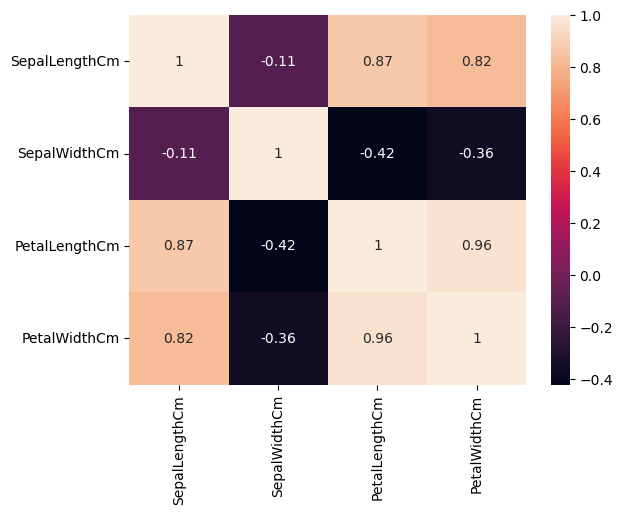

In [3]:
import seaborn as sns
sns.heatmap(df.iloc[:,1:5].corr(),annot=True)


In [4]:
df["Species"].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [5]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [6]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])


corr = numeric_df.corr()
print(corr)

                     Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  \
Id             1.000000       0.716676     -0.397729       0.882747   
SepalLengthCm  0.716676       1.000000     -0.109369       0.871754   
SepalWidthCm  -0.397729      -0.109369      1.000000      -0.420516   
PetalLengthCm  0.882747       0.871754     -0.420516       1.000000   
PetalWidthCm   0.899759       0.817954     -0.356544       0.962757   

               PetalWidthCm  
Id                 0.899759  
SepalLengthCm      0.817954  
SepalWidthCm      -0.356544  
PetalLengthCm      0.962757  
PetalWidthCm       1.000000  


In [7]:
X = df.drop(columns='Species')
y = df['Species']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [8]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [9]:
lr_model = LogisticRegression(multi_class='ovr', solver='lbfgs', max_iter=200)
lr_model.fit(X_train, y_train)

# Predict on the test set
y_pred_lr = lr_model.predict(X_test)

# Evaluate the model
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))
print("Classification Report:\n", classification_report(y_test, y_pred_lr))

Logistic Regression Accuracy: 0.9777777777777777
Confusion Matrix:
 [[19  0  0]
 [ 0 12  1]
 [ 0  0 13]]
Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        19
Iris-versicolor       1.00      0.92      0.96        13
 Iris-virginica       0.93      1.00      0.96        13

       accuracy                           0.98        45
      macro avg       0.98      0.97      0.97        45
   weighted avg       0.98      0.98      0.98        45



In [10]:
data=pd.read_csv('C:\\Users\\ydhar\\Downloads\\weather.csv')
data


,Outlook,Temp,Humidity,Windy,Play
0,rainy,hot,high,0,0
1,rainy,hot,high,1,0
2,overcast,hot,high,0,1
3,sunny,mild,high,0,1
4,sunny,cool,normal,0,1
5,sunny,cool,normal,1,0
6,overcast,cool,normal,1,1
7,rainy,mild,high,0,0
8,rainy,cool,normal,0,1
9,sunny,mild,normal,0,1


In [11]:
# Initialize LabelEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
label_encoder = LabelEncoder()

# Encode categorical features
data['Outlook'] = label_encoder.fit_transform(data['Outlook'])
data['Temp'] = label_encoder.fit_transform(data['Temp'])
data['Humidity'] = label_encoder.fit_transform(data['Humidity'])
data['Windy'] = label_encoder.fit_transform(data['Windy'])

In [12]:
# Define features (X) and target variable (y)
X = data[['Outlook', 'Temp', 'Humidity', 'Windy']]
y = data['Play']
X

,Outlook,Temp,Humidity,Windy
0,1,1,0,0
1,1,1,0,1
2,0,1,0,0
3,2,2,0,0
4,2,0,1,0
5,2,0,1,1
6,0,0,1,1
7,1,2,0,0
8,1,0,1,0
9,2,2,1,0


In [13]:
# Split the data into training and testing sets (70% train, 30% test)
X = df.drop(columns='Species')
y = df['Species']


In [14]:
# Initialize the Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=3)

# Fit the model on training data
dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier(random_state=3)

In [15]:
# Predict on the test set
y_pred = dt_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Display confusion matrix and classification report
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 1.00
Confusion Matrix:
 [[1 0]
 [0 2]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         2

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3



<Axes: >

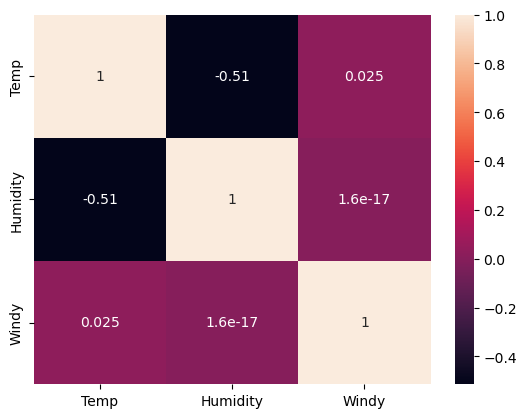

In [16]:
sns.heatmap(data.iloc[:,1:4].corr(),annot=True)

In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder
weather_data=pd.read_csv('C:\\Users\\ydhar\\Downloads\\weather.csv')



# Step 1: One-Hot Encode the categorical data
one_hot_encoder = OneHotEncoder()

# Select categorical columns
categorical_columns = ['Outlook', 'Temp', 'Humidity']

# One-hot encode the categorical features
X_categorical = weather_data[categorical_columns]
X_encoded = one_hot_encoder.fit_transform(X_categorical).toarray()

# Replace the original categorical columns with the one-hot encoded columns
X_other = weather_data.drop(columns=categorical_columns + ['Play'])  # other columns, like 'Windy'
X = np.hstack([X_encoded, X_other.values])  # Combine one-hot encoded and other features
y = weather_data['Play']

# Step 2: Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Step 3: Train Decision Tree Classifier and evaluate performance with different hyperparameters
best_accuracy = 0
best_params = {}

for max_depth in [3, 5, 10]:
    for criterion in ['gini', 'entropy']:
        dt_classifier = DecisionTreeClassifier(max_depth=max_depth, criterion=criterion, random_state=42)
        dt_classifier.fit(X_train, y_train)
        
        # Make predictions on the test set
        y_pred = dt_classifier.predict(X_test)
        
        # Calculate accuracy
        accuracy = accuracy_score(y_test, y_pred)
        print(f"max_depth: {max_depth}, criterion: {criterion}, accuracy: {accuracy}")
        
        # Track best performing model
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_params = {'max_depth': max_depth, 'criterion': criterion}

# Step 4: Output the best parameters and performance
print(f"\nBest Parameters: {best_params}")
print(f"Best Accuracy: {best_accuracy}")


max_depth: 3, criterion: gini, accuracy: 0.75
max_depth: 3, criterion: entropy, accuracy: 1.0
max_depth: 5, criterion: gini, accuracy: 0.75
max_depth: 5, criterion: entropy, accuracy: 1.0
max_depth: 10, criterion: gini, accuracy: 0.75
max_depth: 10, criterion: entropy, accuracy: 1.0

Best Parameters: {'max_depth': 3, 'criterion': 'entropy'}
Best Accuracy: 1.0


In [1]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn import neighbors
import seaborn as sns
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import pylab as pl
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [2]:
df=pd.read_csv('C:\\Users\\ydhar\\Downloads\\BankNote_Authentication.csv')
df

,variance,skewness,curtosis,entropy,class
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


In [5]:
X = df.drop(columns='class')
y = df['class']


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)




In [7]:
from sklearn.tree import DecisionTreeClassifier


cart_clf = DecisionTreeClassifier(
    criterion='gini',       
    max_depth=None,         
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=42
)


cart_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [8]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Predictions
y_pred = cart_clf.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)


Accuracy: 0.9818
Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       148
           1       1.00      0.96      0.98       127

    accuracy                           0.98       275
   macro avg       0.98      0.98      0.98       275
weighted avg       0.98      0.98      0.98       275

[[148   0]
 [  5 122]]
